# Run Similarity.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/MyDrive/Colab Notebooks/COMP4801/Media/similarity/"
!ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1xJGkKqugnovgQtGahv-CuFLbHHEuHbwT/COMP4801/Media/similarity
crop1.png  crop4.png  IMG_6708.JPG  IMG_6712.JPG  IMG_6716.JPG
crop2.png  crop5.png  IMG_6709.JPG  IMG_6714.JPG
crop3.png  crop6.png  IMG_6711.JPG  IMG_6715.JPG


In [ ]:
from Similarity import Similarity
image1 = "crop1.png"
image2 = "crop2.png"
s = Similarity()
s.similarity(image1, image2, method="all")

(False, 0.7839959752234051, 0.65625, 0.6326530612244898)

# Histogram

In [ ]:
from PIL import Image

# Changing photo into RGB format
# Input: 
#     img: an image
# Output: a resized 128 × 128 image
def make_regalur_image(img, size=(128, 128)):
    gray_image = img.resize(size).convert('RGB')
    return gray_image

# Calculating Histogram
# Input:
#     lh: histogram of left image
#     rh: histogram of right image
# Output: 
#     hist: similarity of the histograms (0-1)
def hist_similar(lh, rh):
    assert len(lh) == len(rh)
    hist = sum(1 - (0 if l == r else float(abs(l-r))/max(l,r))for l, r in zip(lh, rh))/len(lh)
    return hist

# Calculating similarity
# Input:
#     li: left image
#     ri: right image
# Output:
#     calculated similarity
def calc_similar(li, ri):
    calc_sim = hist_similar(li.histogram(), ri.histogram())
    return calc_sim

if __name__ == '__main__':
    image1 = Image.open('crop1.png')
    image1 = make_regalur_image(image1)
    image2 = Image.open('crop2.png')
    image2 = make_regalur_image(image2)
    image3 = Image.open('crop3.png')
    image3 = make_regalur_image(image3)
    image4 = Image.open('crop4.png')
    image4 = make_regalur_image(image4)
    image5 = Image.open('crop5.png')
    image5 = make_regalur_image(image5)
    image6 = Image.open('crop6.png')
    image6 = make_regalur_image(image6)

    print("Similarity (1, 2): ",calc_similar(image1, image2))
    print("Similarity (3, 4): ",calc_similar(image3, image4))
    print("Similarity (5, 6): ",calc_similar(image5, image6))
    print("Similarity (1, 4): ",calc_similar(image1, image4))
    print("Similarity (1, 5): ",calc_similar(image1, image5))

Similarity (1, 2):  0.5091268384813091
Similarity (3, 4):  0.38687464191448545
Similarity (5, 6):  0.5771867686939705
Similarity (1, 4):  0.3203374022634186
Similarity (1, 5):  0.29976917855496626


# SSIM & MSE

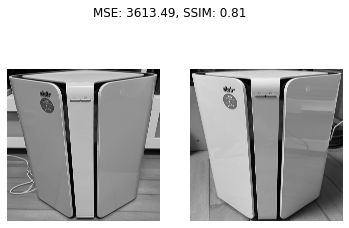

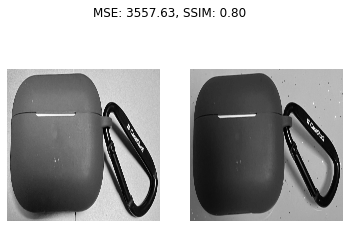

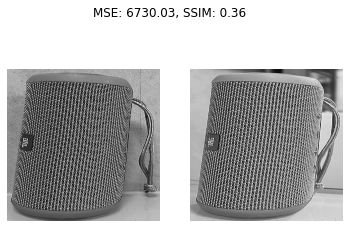

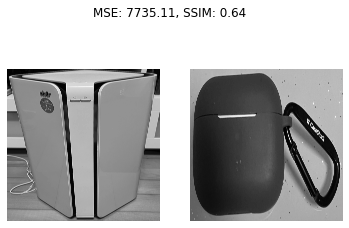

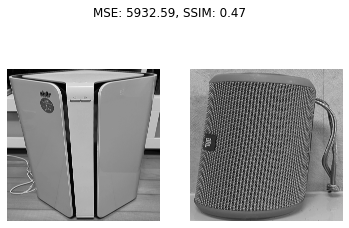

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Calculate MSE
# Input:
#     imageA: image A
#     imageB: imageB
def mse(imageA, imageB):
  err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
  err /= float(imageA.shape[0] * imageA.shape[1])
  return err

# 1. Take in two images
# 2. Calculate its MSE and SSIM
# 3. Show us the values all at once
# Input:
#   imageA: image A
#   imageB: image B
#   title: title of the figure
def compare_image(imageA, imageB, title):
  m = mse(imageA, imageB)
  s = ssim(imageA, imageB, multichannel=True)
  fig = plt.figure(title)
  plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(imageA, cmap = plt.cm.gray)
  plt.axis("off")

  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(imageB, cmap = plt.cm.gray)
  plt.axis("off")

  plt.show()

# load or read images
image1 = cv2.imread('crop1.png')
image2 = cv2.imread('crop2.png')
image3 = cv2.imread('crop3.png')
image4 = cv2.imread('crop4.png')
image5 = cv2.imread('crop5.png')
image6 = cv2.imread('crop6.png')

# resize images to 5000 × 5000
image1 = cv2.resize(image1, (5000, 5000))
image2 = cv2.resize(image2, (5000, 5000))
image3 = cv2.resize(image3, (5000, 5000))
image4 = cv2.resize(image4, (5000, 5000))
image5 = cv2.resize(image5, (5000, 5000))
image6 = cv2.resize(image6, (5000, 5000))

# BGR image is converted to greyscale
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)
image6 = cv2.cvtColor(image6, cv2.COLOR_BGR2GRAY)

# Compare the similarity of the images
compare_image(image1, image2, "Compare")
compare_image(image3, image4, "Compare")
compare_image(image5, image6, "Compare")
compare_image(image1, image4, "Compare")
compare_image(image1, image5, "Compare")

#Cosine Similarity

In [ ]:
from PIL import Image
from numpy import average, dot, linalg

# Unify images
# Input:
#     image: the image
#     size: the size of the image to be resized
#     greyscale: Whether the image is converted to greyscale
def get_thum(image, size=(64,64), greyscale=False):
    # Resize the image, Image.ANTIALIAS is of the highest quality
    image = image.resize(size, Image.ANTIALIAS)
    if greyscale:
        # Convert the image to L mode, which is a greyscale image, and each pixel is represented by 8 bits
        image = image.convert('L')
    return image

# Calculate the cosine distance of the images (image1 and image2)
# Input:
#     image1: image 1
#     image2: image 2
# Output:
#     res: similarity (0-1)
def image_similarity_vectors_via_numpy(image1, image2):
    image1 = get_thum(image1)
    image2 = get_thum(image2)
    images = [image1, image2]
    vectors = []
    norms = []
    for image in images:
        vector = []
        for pixel_tuple in image.getdata():
            vector.append(average(pixel_tuple))
        vectors.append(vector)
        # linalg = linear + algebra，norm
        # Find the norm of an image
        norms.append(linalg.norm(vector, 2))
    a, b = vectors
    a_norm, b_norm = norms
    # dot returns the dot product, which is calculated on a two-dimensional array (matrix)
    res = dot(a / a_norm, b / b_norm)
    return res


image1 = Image.open('crop1.png')
image2 = Image.open('crop2.png')
image3 = Image.open('crop3.png')
image4 = Image.open('crop4.png')
image5 = Image.open('crop5.png')
image6 = Image.open('crop6.png')

cosin1 = image_similarity_vectors_via_numpy(image1, image2)
cosin2 = image_similarity_vectors_via_numpy(image3, image4)
cosin3 = image_similarity_vectors_via_numpy(image5, image6)
cosin4 = image_similarity_vectors_via_numpy(image1, image4)
cosin5 = image_similarity_vectors_via_numpy(image1, image5)

print("Similarity (1, 2): ",cosin1)
print("Similarity (3, 4): ",cosin2)
print("Similarity (5, 6): ",cosin3)
print("Similarity (1, 4): ",cosin4)
print("Similarity (1, 5): ",cosin5)

Similarity (1, 2):  0.9740916435202092
Similarity (3, 4):  0.9745220741533367
Similarity (5, 6):  0.989180533459064
Similarity (1, 4):  0.9312516695898204
Similarity (1, 5):  0.9671192101099173


#Difference Hash (dhash)

In [ ]:
# Install required package: ImageHash
!pip install imagehash

     |████████████████████████████████| 812 kB 5.0 MB/s 
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=15eeab7c23c80dee15d4a23332ddf87388ee791be931d971a891c87d4725485b
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built imagehash


In [ ]:
from PIL import Image
import imagehash

# Calculate similarity
# Input:
#     hash1: dhash of image1
#     hash2: dhash of image2
# Output:
#     sim: similarity of image1 and image2 (0-1)
def cal_similar(hash1, hash2):
  sim = 1 - (hash1 - hash2) / len(hash1.hash) ** 2
  return sim

hash_size = 8

dhash1 = imagehash.dhash(Image.open('crop1.png'), hash_size = hash_size)
dhash2 = imagehash.dhash(Image.open('crop2.png'), hash_size = hash_size)
dhash3 = imagehash.dhash(Image.open('crop3.png'), hash_size = hash_size)
dhash4 = imagehash.dhash(Image.open('crop4.png'), hash_size = hash_size)
dhash5 = imagehash.dhash(Image.open('crop5.png'), hash_size = hash_size)
dhash6 = imagehash.dhash(Image.open('crop6.png'), hash_size = hash_size)

print("Similarity (1, 2): ",cal_similar(dhash1, dhash2))
print("Similarity (3, 4): ",cal_similar(dhash3, dhash4))
print("Similarity (5, 6): ",cal_similar(dhash5, dhash6))
print("Similarity (1, 4): ",cal_similar(dhash1, dhash4))
print("Similarity (1, 5): ",cal_similar(dhash1, dhash5))

Similarity (1, 2):  0.65625
Similarity (3, 4):  0.8125
Similarity (5, 6):  0.921875
Similarity (1, 4):  0.5
Similarity (1, 5):  0.53125


In [ ]:
# Another Difference Hash method
import cv2

# Get the dhash of an image
# Input:
#     image: the image
# Output:
#     result: the dhash
def dhash(image):
  image = cv2.resize(image, (9, 8), interpolation = cv2.INTER_CUBIC)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  dhash_str = ''
  for i in range(8):
    for j in range(8):
      if gray[i, j] > gray[i, j+1]:
        dhash_str = dhash_str + '1'
      else:
        dhash_str = dhash_str + '0'
  result = ''
  for i in range(0, 64, 4):
    result += ''.join('%x' % int(dhash_str[i: i+4], 2))
  return result

# Compare the dash of the images (image1 and image2)
# Input:
#     hash1: dhash of image1
#     hash2: dhash of image2
# Output:
#     sim: similarity of image1 and image2
def compHash(hash1, hash2):
  n = 0
  if len(hash1) != len(hash2):
    return -1
  for i in range(len(hash1)):
    if hash1[i] != hash2[i]:
      n += 1
  return n

image1 = cv2.imread('crop1.png')
image2 = cv2.imread('crop2.png')
image3 = cv2.imread('crop3.png')
image4 = cv2.imread('crop4.png')
image5 = cv2.imread('crop5.png')
image6 = cv2.imread('crop6.png')

dhash1 = dhash(image1)
dhash2 = dhash(image2)
dhash3 = dhash(image3)
dhash4 = dhash(image4)
dhash5 = dhash(image5)
dhash6 = dhash(image6)

comphash1 = compHash(dhash1, dhash2)
comphash2 = compHash(dhash3, dhash4)
comphash3 = compHash(dhash5, dhash6)
comphash4 = compHash(dhash1, dhash5)
comphash5 = compHash(dhash3, dhash6)

print("1, 2: ", comphash1)
print("3, 4: ", comphash2)
print("5, 6: ", comphash3)
print("1, 5: ", comphash4)
print("3, 6: ", comphash5)

1, 2:  14
3, 4:  10
5, 6:  11
1, 5:  16
3, 6:  15


#Average Hash (ahash)

In [ ]:
from PIL import Image
import imagehash

# Calculate the similarity of 2 images (image1 and image2)
# Input:
#     hash1: average hash of image1
#     hash2: average hash of image2
# Output:
#     sim: similarity of image1 and image2
def cal_similar(hash1, hash2):
  sim = 1 - (hash1 - hash2) / len(hash1.hash) ** 2
  return sim

hash_size = 8

# Get the average hash of an image
ahash1 = imagehash.average_hash(Image.open('crop1.png'), hash_size = hash_size)
ahash2 = imagehash.average_hash(Image.open('crop2.png'), hash_size = hash_size)
ahash3 = imagehash.average_hash(Image.open('crop3.png'), hash_size = hash_size)
ahash4 = imagehash.average_hash(Image.open('crop4.png'), hash_size = hash_size)
ahash5 = imagehash.average_hash(Image.open('crop5.png'), hash_size = hash_size)
ahash6 = imagehash.average_hash(Image.open('crop6.png'), hash_size = hash_size)

print("Similarity (1, 2): ",cal_similar(ahash1, ahash2))
print("Similarity (3, 4): ",cal_similar(ahash3, ahash4))
print("Similarity (5, 6): ",cal_similar(ahash5, ahash6))
print("Similarity (1, 4): ",cal_similar(ahash1, ahash4))
print("Similarity (1, 5): ",cal_similar(ahash1, ahash5))

Similarity (1, 2):  0.328125
Similarity (3, 4):  0.78125
Similarity (5, 6):  0.890625
Similarity (1, 4):  0.5625
Similarity (1, 5):  0.5


In [ ]:
# Another Average Hash method
import cv2

# Get the ahash of an image
# Input:
#     image: the image
# Output:
#     result: the ahash
def ahash(image):
  image = cv2.resize(image, (8, 8), interpolation = cv2.INTER_CUBIC)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ahash_str = ''
  for i in range(8):
    for j in range(8):
      s += gray[i, j]
  avg = s/64
  ahash_str = ''
  for i in range(8):
    for j in range(8):
      if gray[i, j] >  avg:
        ahash_str = ahash_str + '1'
      else:
        ahash_str = ahash_str + '0'
  result = ''
  for i in range(0, 64, 4):
    result += ''.join('%x' % int(ahash_str[i: i+4], 2))
  return result

ahash1 = ahash(image1)
ahash2 = ahash(image2)
ahash3 = ahash(image3)
ahash4 = ahash(image4)
ahash5 = ahash(image5)
ahash6 = ahash(image6)

comphash1 = compHash(ahash1, ahash2)
comphash2 = compHash(ahash3, ahash4)
comphash3 = compHash(ahash5, ahash6)
comphash4 = compHash(ahash1, ahash5)
comphash5 = compHash(ahash3, ahash6)

print("1, 2: ", comphash1)
print("3, 4: ", comphash2)
print("5, 6: ", comphash3)
print("1, 5: ", comphash4)
print("3, 6: ", comphash5)

1, 2:  15
3, 4:  7
5, 6:  14
1, 5:  16
3, 6:  16


#Perception Hash

In [ ]:
from PIL import Image
import imagehash

# Calculate the similarity of 2 images (image1 and image2)
# Input:
#     hash1: perception hash of image1
#     hash2: perception hash of image2
# Output:
#     sim: similarity of image1 and image2
def cal_similar(hash1, hash2):
  sim = 1 - (hash1 - hash2) / len(hash1.hash) ** 2
  return sim

highfreq_factor = 1
hash_size = 8
image_size = hash_size * highfreq_factor

phash1 = imagehash.phash(Image.open('crop1.png'), hash_size = hash_size, highfreq_factor = highfreq_factor)
phash2 = imagehash.phash(Image.open('crop2.png'), hash_size = hash_size, highfreq_factor = highfreq_factor)
phash3 = imagehash.phash(Image.open('crop3.png'), hash_size = hash_size, highfreq_factor = highfreq_factor)
phash4 = imagehash.phash(Image.open('crop4.png'), hash_size = hash_size, highfreq_factor = highfreq_factor)
phash5 = imagehash.phash(Image.open('crop5.png'), hash_size = hash_size, highfreq_factor = highfreq_factor)
phash6 = imagehash.phash(Image.open('crop6.png'), hash_size = hash_size, highfreq_factor = highfreq_factor)

print("Similarity (1, 2): ",cal_similar(phash1, phash2))
print("Similarity (3, 4): ",cal_similar(phash3, phash4))
print("Similarity (5, 6): ",cal_similar(phash5, phash6))
print("Similarity (1, 4): ",cal_similar(phash1, phash4))
print("Similarity (1, 5): ",cal_similar(phash1, phash5))

Similarity (1, 2):  0.53125
Similarity (3, 4):  0.75
Similarity (5, 6):  0.75
Similarity (1, 4):  0.5
Similarity (1, 5):  0.5


#Wavelet Hash (whash)

In [ ]:
from matplotlib.font_manager import MSFolders
from PIL import Image
import imagehash

# Calculate the similarity of 2 images (image1 and image2)
# Input:
#     hash1: wavelet hash of image1
#     hash2: wavelet hash of image2
# Output:
#     sim: similarity of image1 and image2
def cal_similar(hash1, hash2):
  sim = 1 - (hash1 - hash2) / len(hash1.hash) ** 2
  return sim

hash_size = 8
# mode = 'haar' for whash
mode = 'haar'
image_scale = 64

whash1 = imagehash.whash(Image.open('crop1.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)
whash2 = imagehash.whash(Image.open('crop2.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)
whash3 = imagehash.whash(Image.open('crop3.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)
whash4 = imagehash.whash(Image.open('crop4.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)
whash5 = imagehash.whash(Image.open('crop5.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)
whash6 = imagehash.whash(Image.open('crop6.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)

print("Similarity [haar] (1, 2): ",cal_similar(whash1, whash2))
print("Similarity [haar] (3, 4): ",cal_similar(whash3, whash4))
print("Similarity [haar] (5, 6): ",cal_similar(whash5, whash6))
print("Similarity [haar] (1, 4): ",cal_similar(whash1, whash4))
print("Similarity [haar] (1, 5): ",cal_similar(whash1, whash5))

Similarity [haar] (1, 2):  0.34375
Similarity [haar] (3, 4):  0.78125
Similarity [haar] (5, 6):  0.96875
Similarity [haar] (1, 4):  0.5625
Similarity [haar] (1, 5):  0.46875


In [ ]:
# mode = 'db4' for whash
mode = 'db4'

whash1 = imagehash.whash(Image.open('crop1.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)
whash2 = imagehash.whash(Image.open('crop2.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)
whash3 = imagehash.whash(Image.open('crop3.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)
whash4 = imagehash.whash(Image.open('crop4.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)
whash5 = imagehash.whash(Image.open('crop5.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)
whash6 = imagehash.whash(Image.open('crop6.png'), image_scale = image_scale, hash_size = hash_size, mode = mode)

print("Similarity [db4] (1, 2): ",cal_similar(whash1, whash2))
print("Similarity [db4] (3, 4): ",cal_similar(whash3, whash4))
print("Similarity [db4] (5, 6): ",cal_similar(whash5, whash6))
print("Similarity [db4] (1, 4): ",cal_similar(whash1, whash4))
print("Similarity [db4] (1, 5): ",cal_similar(whash1, whash5))

Similarity [db4] (1, 2):  0.6326530612244898
Similarity [db4] (3, 4):  0.9081632653061225
Similarity [db4] (5, 6):  0.7653061224489796
Similarity [db4] (1, 4):  0.3877551020408163
Similarity [db4] (1, 5):  0.4387755102040817


#Sewar Package

Compare similarity with MSE, RMSE, PSNR, uqi, SSIM, ergas, scc, rase, sam, msssim, vifp

In [ ]:
# Install required package: Sewar
!pip install sewar

  Created wheel for sewar: filename=sewar-0.4.4-py3-none-any.whl size=10390 sha256=378e6892272c33ace5f0cb946752a5c6a4e990d884e96da087ac46c6526fe714
  Stored in directory: /root/.cache/pip/wheels/b5/00/df/f1ba40d0d44c95b0db52804e518c128d5631866b91ea1960ba
Successfully built sewar


In [ ]:
import cv2
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp

image1 = cv2.imread('crop1.png')
image2 = cv2.imread('crop2.png')
image3 = cv2.imread('crop3.png')
image4 = cv2.imread('crop4.png')
image5 = cv2.imread('crop5.png')
image6 = cv2.imread('crop6.png')

image1 = cv2.resize(image1, (5000, 5000))
image2 = cv2.resize(image2, (5000, 5000))
image3 = cv2.resize(image3, (5000, 5000))
image4 = cv2.resize(image4, (5000, 5000))
image5 = cv2.resize(image5, (5000, 5000))
image6 = cv2.resize(image6, (5000, 5000))

print("MSE: ", mse(image1,image2))
print("RMSE: ", rmse(image1, image2))
print("PSNR: ", psnr(image1, image2))
print("SSIM: ", ssim(image1, image2))
print("UQI: ", uqi(image1, image2))
print("MSSSIM: ", msssim(image1, image2))
print("ERGAS: ", ergas(image1, image2))
print("SCC: ", scc(image1, image2))
print("RASE: ", rase(image1, image2))
print("SAM: ", sam(image1, image2))
print("VIF: ", vifp(image1, image2))

MSE:  3665.9776754
RMSE:  60.54731765652381
PSNR:  12.488905449444161
SSIM:  (0.7392343269163425, 0.8331033825854027)
UQI:  0.8015525740415033
MSSSIM:  (0.7434369247232802+0j)
ERGAS:  45920.339329298884
SCC:  -0.0005589631092885598


/usr/local/lib/python3.7/dist-packages/sewar/full_ref.py:248: RuntimeWarning: divide by zero encountered in true_divide
  rase_map = (100./M) * np.sqrt( np.sum(rmse_map**2,axis=2) / N )


RASE:  inf
SAM:  0.4167883865667703
VIF:  0.05775514964872495


# DeepAI Image Similarity API

In [ ]:
import requests
r = requests.post(
    "https://api.deepai.org/api/image-similarity",
    files={
        'image1': open('crop3.png', 'rb'),
        'image2': open('crop6.png', 'rb'),
    },
    headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}
)
print(r.json())

{'id': 'a5d6665a-f6b5-4b82-8903-b9041b83eeb0', 'output': {'distance': 30}}
